# Living Things

Replicate the Rogers and McClelland network that learns categories of living things.

Code partially taken from [here](https://iamtrask.github.io/2015/07/12/basic-python-network/).

First import stuff, load the training set, and define the sigmoid function.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

living_things = pd.read_excel('livingthings1.xls')
living_things

,Interpretation,Ponderosa,White-Pine,Live-Oak,Black-Oak,French-Rose,Musk-Rose,Common-Daisy,Sunflower,Blackbird,Redwing,Brimstone-Canary,Mosaic-Canary,Striped-Bass,Spotted-Bas,Chinook-Salmon,Sockyeye-Salmon
0,Living,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Plant,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
2,Animal,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
3,Tree,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Flower,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0
5,Bird,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0
6,Pine,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Hardwood,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Softwood,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Oak,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
living_things.set_index('Interpretation',inplace=True)
living_things.head()

,Ponderosa,White-Pine,Live-Oak,Black-Oak,French-Rose,Musk-Rose,Common-Daisy,Sunflower,Blackbird,Redwing,Brimstone-Canary,Mosaic-Canary,Striped-Bass,Spotted-Bas,Chinook-Salmon,Sockyeye-Salmon
Interpretation,,,,,,,,,,,,,,,,
Living,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Plant,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
Animal,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
Tree,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
Flower,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0


Initialize inputs and outputs. Each row is an input or output vector.

In [3]:
"""
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
"""

num_living_things = 16
X = np.identity(num_living_things)
print(X.shape, X, sep='\n')

(16, 16)
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

In [4]:
"""
y = np.array([[0],
              [1],
              [1],
              [0]])
"""

Y = living_things.values.T
print(Y.shape, Y, sep='\n')

(16, 42)
[[1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
  0 0 0 1 0]
 [1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
  0 0 0 1 0]
 [1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0
  0 0 0 1 0]
 [1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0
  0 0 0 1 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
  0 0 0 1 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
  0 0 0 1 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 1 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 1 0]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1
  1 0 0 0 1]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1
  1 0 0 0 1]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1
  1 0 0 0 1]
 [1 0 1 0 0 

Initialize the network architecture.

In [5]:
numb_input_units = len(X)
numb_hidden_units = 10 # this is just based on what Whit had done previously
numb_output_units = Y.shape[1]

print(numb_input_units, numb_hidden_units, numb_output_units)

16 10 42


Randomly initialize our weights with mean 0.

In [6]:
np.random.seed(1)
syn0 = 2*np.random.random((numb_input_units ,numb_hidden_units)) - 1
syn1 = 2*np.random.random((numb_hidden_units,numb_output_units)) - 1

print(syn0.shape, syn1.shape)

(16, 10) (10, 42)


Train the network. Each `j` is an epoch; this program updates the weights after each full presentation of the training data. That's why the program feeds the entire training set through simultaneously.

In [7]:
ecrit = 1
maxepochs = 5000

In [8]:
for j in range(maxepochs):

    # Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = sigmoid(np.dot(l0,syn0))
    l2 = sigmoid(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = Y - l2
    
    # in what direction is the target value?
    # were we really sure? that is, was the activation level of l2 very high or very low? if so, don't change too much (exactly how much determined by the derivative of the sigmoid fxn).
    l2_delta = l2_error*sigmoid(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure (again, in terms of activation level of l1)? if so, don't change too much.
    l1_delta = l1_error * sigmoid(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

    if (j% 10000) == 0:
        print("\nEpoch: "    + str(j))
        #print("l0 input:\n" + str(l0))
        #print("l1 activation:\n" + str(l1))
        #print("l2 activation:\n" + str(l2))
        #print("Weights from input to hidden:\n" + str(syn0))
        #print("Weights from hidden to output:\n" + str(syn1))
        #print("l2_error:\n" + str(l2_error))
        #print("l2_delta:\n" + str(l2_delta))
        #print("l1_error:\n" + str(l1_error))
        #print("l1_delta:\n" + str(l1_error))
    
    if sum(sum(abs(l2_error))) < ecrit:
        break

print("Last epoch number:", j)
print("Total erorr at end of training:",sum(sum(abs(l2_error))))
print("Error by living thing:\n",abs(l2_error).sum(axis=1))


Epoch: 0
Last epoch number: 4999
Total erorr at end of training: 2.4224038804
Error by living thing:
 [ 0.16202775  0.18149867  0.12219143  0.2303641   0.16776277  0.18277988
  0.1134067   0.1221008   0.13504356  0.14469472  0.13575751  0.15226927
  0.12536856  0.1452705   0.14599046  0.1558772 ]


In [9]:
living_things_trained = pd.DataFrame(data=l1, index=living_things.columns)
living_things_trained

,0,1,2,3,4,5,6,7,8,9
Ponderosa,0.975737,0.989193,0.025432,0.971654,0.017935,0.329499,0.191914,0.173069,0.012840,0.063548
White-Pine,0.413485,0.976580,0.011743,0.980792,0.145247,0.976466,0.015689,0.021936,0.227677,0.962975
Live-Oak,0.962173,0.961860,0.030941,0.852961,0.965414,0.050155,0.037911,0.030380,0.071426,0.981243
Black-Oak,0.974922,0.989195,0.561276,0.033962,0.989038,0.020315,0.431753,0.010696,0.015359,0.321319
French-Rose,0.186073,0.377953,0.261177,0.972732,0.344201,0.029037,0.989563,0.021577,0.969705,0.026631
Musk-Rose,0.027612,0.166010,0.375470,0.980682,0.025799,0.631375,0.984500,0.022870,0.967403,0.956292
Common-Daisy,0.973693,0.030686,0.965737,0.740327,0.287274,0.050334,0.911160,0.089820,0.873741,0.965013
Sunflower,0.969681,0.090774,0.939569,0.564677,0.081613,0.043972,0.982057,0.044312,0.056600,0.917682
Blackbird,0.096359,0.890315,0.983937,0.081646,0.961635,0.951444,0.158395,0.957400,0.053748,0.059173
Redwing,0.017507,0.959623,0.971528,0.262288,0.121206,0.976881,0.174722,0.975137,0.575530,0.099397


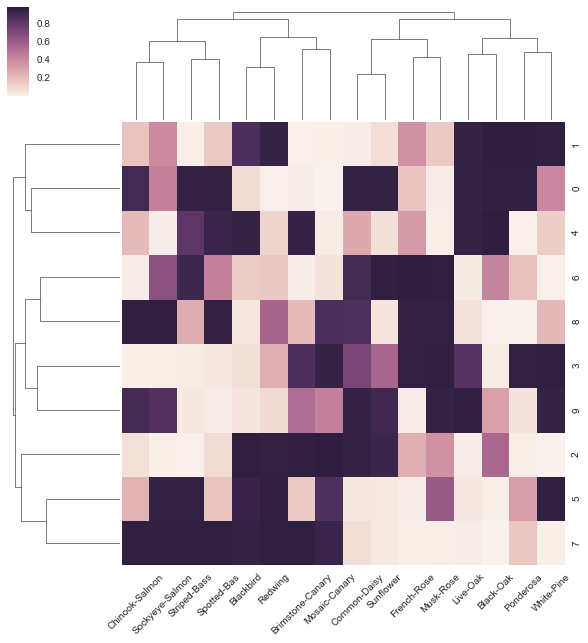

In [10]:
g = sns.clustermap(living_things_trained.T);
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45);

As expected, similar categories, like two different kinds of canary, have similar hidden unit representations.

Now try a PCA on the hidden unit representations

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
living_things_trained_reduced = pca.fit_transform(living_things_trained)
living_things_trained_reduced = pd.DataFrame(data=living_things_trained_reduced, index=living_things_trained.index)
living_things_trained_reduced

,0,1,2
Ponderosa,-0.602311,0.548394,0.440582
White-Pine,-0.456114,0.063276,0.883313
Live-Oak,-0.909769,0.809118,0.240482
Black-Oak,-0.467577,1.077233,-0.123601
French-Rose,-0.460399,-0.496861,-0.062083
Musk-Rose,-0.437122,-1.106964,0.173264
Common-Daisy,-0.725832,-0.643070,-0.429810
Sunflower,-0.840090,-0.267419,-0.231836
Blackbird,1.007731,0.695962,0.527853
Redwing,0.967696,-0.015466,0.651643


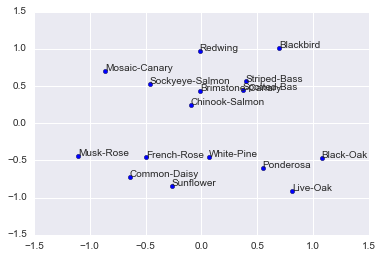

In [12]:
y = living_things_trained_reduced.iloc[:,0]
z = living_things_trained_reduced.iloc[:,1]
n = living_things_trained_reduced.index

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))